In [1]:
from __future__ import (absolute_import, division,
                        print_function, unicode_literals)

In [2]:
from IPython.display import display, Image


In [3]:
import warnings
warnings.simplefilter('ignore')

In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
PATH = "../data"
os.listdir(PATH)

['avarage_ps.csv', 'NormalPlayer.csv', 'player_price.csv', 'player_stats.csv']

In [6]:
df_pp = pd.read_csv(PATH+'/player_price.csv')
df_ps = pd.read_csv(PATH+'/player_stats.csv')

In [7]:
df_pp['timestamp'] = pd.to_datetime(df_pp['timestamp'], unit='ms')

In [8]:
df_pp.head()

,timestamp,ps_price,xbox_price,player_id,player_name
0,2016-09-23,0,0,1,Pelé
1,2016-09-24,0,10000000,1,Pelé
2,2016-09-25,0,0,1,Pelé
3,2016-09-26,0,0,1,Pelé
4,2016-09-27,0,10000000,1,Pelé


In [10]:
df_pp['year'] = df_pp['timestamp'].apply(lambda x: x.year)
df_pp['month'] = df_pp['timestamp'].apply(lambda x: x.month)
df_pp['day'] = df_pp['timestamp'].apply(lambda x: x.day)

In [12]:
df_norm_player = df_ps[(df_ps['revision']=='Normal')]

In [13]:
rm = df_norm_player[["player_id"]].merge(df_pp, on=['player_id'], how='inner')

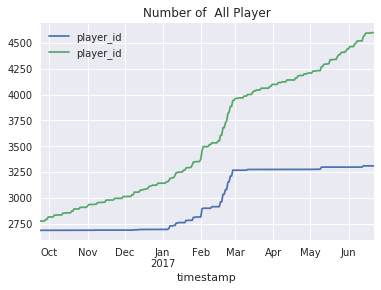

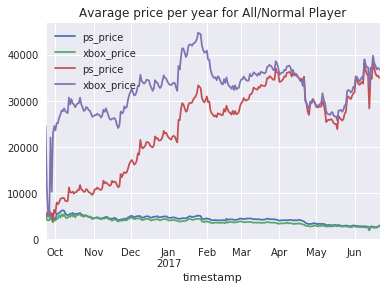

In [100]:
ax = rm[['timestamp','player_id']].groupby('timestamp').count().plot(title = 'Number of Normal Player')
df_pp[['timestamp','player_id']].groupby('timestamp').count().plot(title = 'Number of  All Player', ax = ax)
ax = rm[['timestamp','ps_price','xbox_price']].groupby('timestamp').mean().plot(title = 'Avarage price per year for Normal Player')
df_pp[['timestamp','ps_price','xbox_price']].groupby('timestamp').mean().plot(title = 'Avarage price per year for All/Normal Player', ax= ax)


In [15]:
rm[['month','ps_price','xbox_price']].groupby('month', sort=False).mean()

,ps_price,xbox_price
month,,
9,5099.166395,4391.608671
10,5415.556148,4996.003220
11,4568.790081,4352.764055
12,4920.801744,4383.307631
1,4741.330629,4151.123945
2,4276.713106,3700.745139
3,4394.947626,3680.180924
4,3930.530373,3281.005457
5,3109.367887,2844.671940


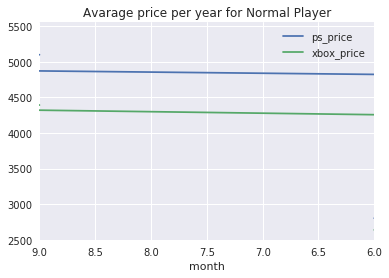

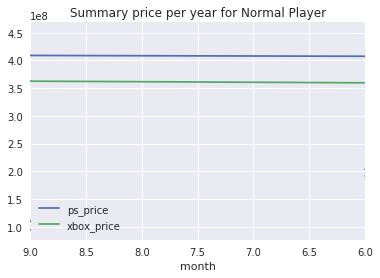

In [90]:
rm[['month','ps_price','xbox_price']].groupby('month', sort=False).mean().plot(title = 'Avarage price per month for Normal Player')
rm[['month','ps_price','xbox_price']].groupby('month',sort=False).sum().plot(title = 'Summary price per month for Normal Player')

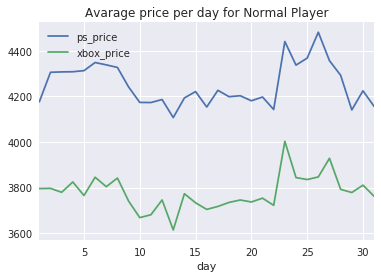

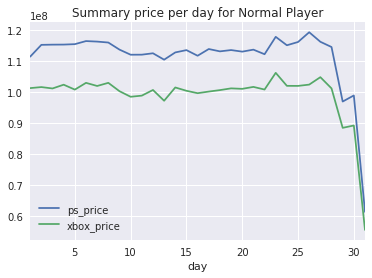

In [91]:
rm[['day','ps_price','xbox_price']].groupby('day').mean().plot(title = 'Avarage price per day for Normal Player')
rm[['day','ps_price','xbox_price']].groupby('day').sum().plot(title = 'Summary price per day for Normal Player')

In [93]:
start = rm['timestamp'][0]
print("Start Day", start, 'Friday')
rm['businnes_day'] = rm.index.to_series().apply(lambda x: (x+5)%7) 

Start Day 2016-09-23 00:00:00 Friday


In [94]:
rm.head()

,player_id,timestamp,ps_price,xbox_price,player_name,year,month,day,businnes_day
0,2,2016-09-23,3051000,1730000,Cristiano Ronaldo,2016,9,23,5
1,2,2016-09-24,3051000,1687125,Cristiano Ronaldo,2016,9,24,6
2,2,2016-09-25,3000615,1685727,Cristiano Ronaldo,2016,9,25,0
3,2,2016-09-26,3038065,1585871,Cristiano Ronaldo,2016,9,26,1
4,2,2016-09-27,2924592,1441457,Cristiano Ronaldo,2016,9,27,2


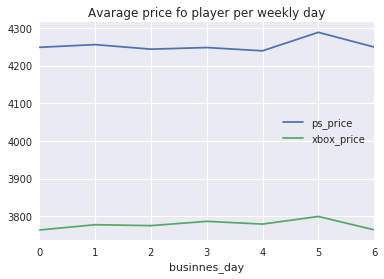

In [101]:
rm[['businnes_day','ps_price','xbox_price']].groupby('businnes_day').mean().plot(title="Avarage price fo player per weekly day")

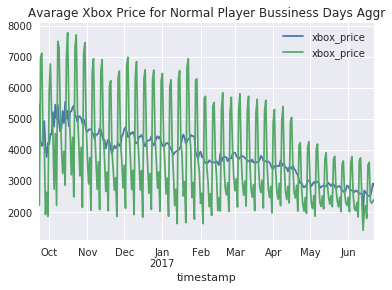

In [103]:
ax = bd_df = rm[(rm['businnes_day']<=5) | (rm['businnes_day']>0)][['timestamp','xbox_price']].groupby('timestamp').mean().plot()
vd_df = rm[(rm['businnes_day']==0) | (rm['businnes_day']>5)][['timestamp','xbox_price']].groupby('timestamp').mean().plot(ax=ax, title='Avarage Xbox Price for Normal Player Bussiness Days Aggr')

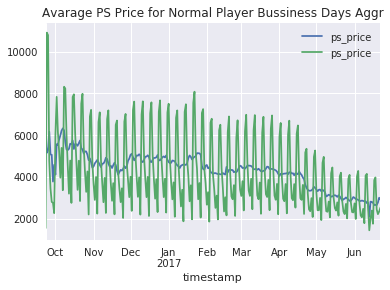

In [105]:
ax = bd_df = rm[(rm['businnes_day']<=5) | (rm['businnes_day']>0)][['timestamp','ps_price']].groupby('timestamp').mean().plot()
vd_df = rm[(rm['businnes_day']==0) | (rm['businnes_day']>5)][['timestamp','ps_price']].groupby('timestamp').mean().plot(ax=ax,title='Avarage PS Price for Normal Player Bussiness Days Aggr')


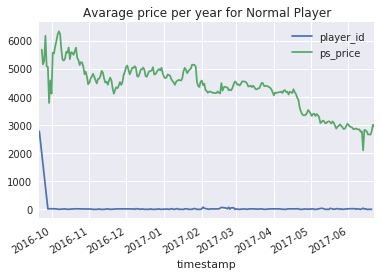

In [98]:
df_ps['added_on'] = pd.to_datetime(df_ps['added_on'])
ax = df_ps[['added_on','player_id']].groupby('added_on').count().plot()
rm[['timestamp','ps_price']].groupby('timestamp').mean().plot(title = 'Avarage price per year for Normal Player/ Number of added players', ax=ax)


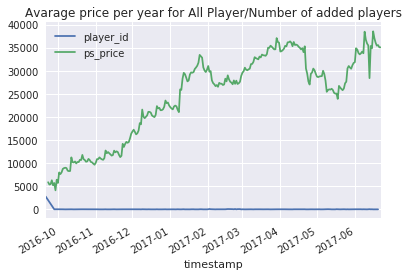

In [107]:
ax = df_ps[['added_on','player_id']].groupby('added_on').count().plot()
df_pp[['timestamp','ps_price']].groupby('timestamp').mean().plot(title = 'Avarage price per year for All Player/Number of added players', ax=ax)
